In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data=pd.read_csv('russia_losses_equipment.csv')
data.drop(['date','BUK','fuel tank','special equipment','day'], inplace=True, axis=1)
data.head()

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare
0,27,26,146,706,49,4,30,2,2,0
1,29,29,150,816,74,21,291,3,2,5
2,29,29,198,846,77,24,305,3,2,7
3,30,31,211,862,85,40,355,3,2,9
4,30,31,217,900,90,42,374,3,2,11


In [2]:
data.shape

(20, 10)

In [3]:
x=data['tank']
x

0     146
1     150
2     198
3     211
4     217
5     251
6     269
7     285
8     290
9     303
10    317
11    335
12    353
13    362
14    374
15    389
16    404
17    430
18    444
19    450
Name: tank, dtype: int64

In [4]:
dt=data.sum(axis=0)

print(dt)

aircraft                  1063
helicopter                1346
tank                      6178
APC                      21591
field artillery           2470
MRL                       1023
military auto            10113
drone                      124
naval ship                  52
anti-aircraft warfare      494
dtype: int64


In [5]:
my_df  = pd.DataFrame(columns = ['Equipments','Destroyed'])
my_df['Equipments']=list(data.keys())
my_df['Destroyed']=list(data.sum(axis=0))
my_df

,Equipments,Destroyed
0,aircraft,1063
1,helicopter,1346
2,tank,6178
3,APC,21591
4,field artillery,2470
5,MRL,1023
6,military auto,10113
7,drone,124
8,naval ship,52
9,anti-aircraft warfare,494


In [6]:
new=data.describe()
new

,aircraft,helicopter,tank,APC,field artillery,MRL,military auto,drone,naval ship,anti-aircraft warfare
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,53.150000,67.300000,308.900000,1079.550000,123.500000,51.150000,505.650000,6.200000,2.600000,24.700000
std,21.957555,30.161146,93.487348,212.924863,41.429077,17.756467,204.520305,3.071088,0.502625,13.155347
min,27.000000,26.000000,146.000000,706.000000,49.000000,4.000000,30.000000,2.000000,2.000000,0.000000
25%,32.250000,35.500000,242.500000,929.250000,101.250000,48.000000,396.500000,3.000000,2.000000,16.250000
50%,48.500000,80.500000,310.000000,1053.000000,120.000000,56.000000,478.000000,7.000000,3.000000,27.500000
75%,74.750000,87.000000,377.750000,1231.750000,142.500000,62.500000,604.250000,7.250000,3.000000,34.000000
max,93.000000,112.000000,450.000000,1448.000000,205.000000,72.000000,879.000000,12.000000,3.000000,43.000000


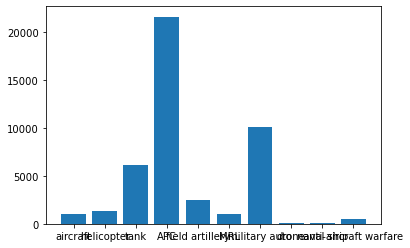

In [7]:
plt.bar(my_df['Equipments'],my_df['Destroyed'])
plt.show()

In [8]:
data['day']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
print(data)

    aircraft  helicopter  tank   APC  field artillery  MRL  military auto  \
0         27          26   146   706               49    4             30   
1         29          29   150   816               74   21            291   
2         29          29   198   846               77   24            305   
3         30          31   211   862               85   40            355   
4         30          31   217   900               90   42            374   
5         33          37   251   939              105   50            404   
6         39          40   269   945              105   50            409   
7         44          48   285   985              109   50            447   
8         46          68   290   999              117   50            454   
9         48          80   303  1036              120   56            474   
10        49          81   317  1070              120   56            482   
11        49          81   335  1105              123   56            526   

In [9]:
newdata=pd.DataFrame(columns=['Days','Daily_loss'])
newdata['Days']=data['day']
newdata['Daily_loss']=list(data.sum(axis=1))
print(newdata)

    Days  Daily_loss
0      1         993
1      2        1422
2      3        1523
3      4        1632
4      5        1705
5      6        1848
6      7        1888
7      8        2003
8      9        2066
9     10        2164
10    11        2224
11    12        2326
12    13        2453
13    14        2547
14    15        2621
15    16        2697
16    17        2778
17    18        3151
18    19        3286
19    20        3337


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
x=newdata[['Days']]
y=newdata[['Daily_loss']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5)

In [11]:
x_train.head()

,Days
19,20
7,8
17,18
9,10
6,7


In [12]:
lr=LinearRegression()

In [14]:
lr.fit(x_train,y_train)

LinearRegression()

In [18]:
model_pred=lr.predict(x_test)

In [19]:
model_pred

array([[2696.7088274 ],
       [2196.35638999],
       [3096.99077734],
       [2396.49736495],
       [2896.84980237],
       [1595.93346509],
       [2596.63833992],
       [2996.92028986],
       [1295.72200264],
       [1996.21541502]])

In [17]:
y_test.head()

,Daily_loss
14,2621
9,2164
18,3286
11,2326
16,2778
